In [6]:
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftSilhouetteShader,
    TexturesUV,
    TexturesVertex,
    BlendParams
)
import torch

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device)
device

device(type='cpu')

In [12]:
mesh = load_objs_as_meshes(["data/bunny.obj"], device=device)
texture = TexturesVertex(mesh.verts_packed().unsqueeze(0))
mesh.textures = texture
R, T = look_at_view_transform(2.7, 0, 180)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Define the silhouette shader
silhouette_shader = SoftSilhouetteShader()

# Define rasterization settings
raster_settings = RasterizationSettings(
    image_size=512, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
    bin_size=0, 
    max_faces_per_bin=None,
    perspective_correct=False,
)

# Define blend parameters for silhouette rendering
blend_params = BlendParams(sigma=1e-4, gamma=1e-4)

# Create a phong renderer by composing a rasterizer and a shader
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras, 
        raster_settings=raster_settings
    ),
    shader=silhouette_shader
)

# Render the mesh
silhouette = renderer(meshes_world=mesh, cameras=cameras)

An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/NIE/lib/python3.10/site-packages/iopath/common/file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "/opt/homebrew/anaconda3/envs/NIE/lib/python3.10/site-packages/iopath/common/event_logger.py", line 97, in log_event
    del self._evt
AttributeError: _evt
/opt/homebrew/anaconda3/envs/NIE/lib/python3.10/site-packages/pytorch3d/io/obj_io.py:544: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


(-0.5, 511.5, 511.5, -0.5)

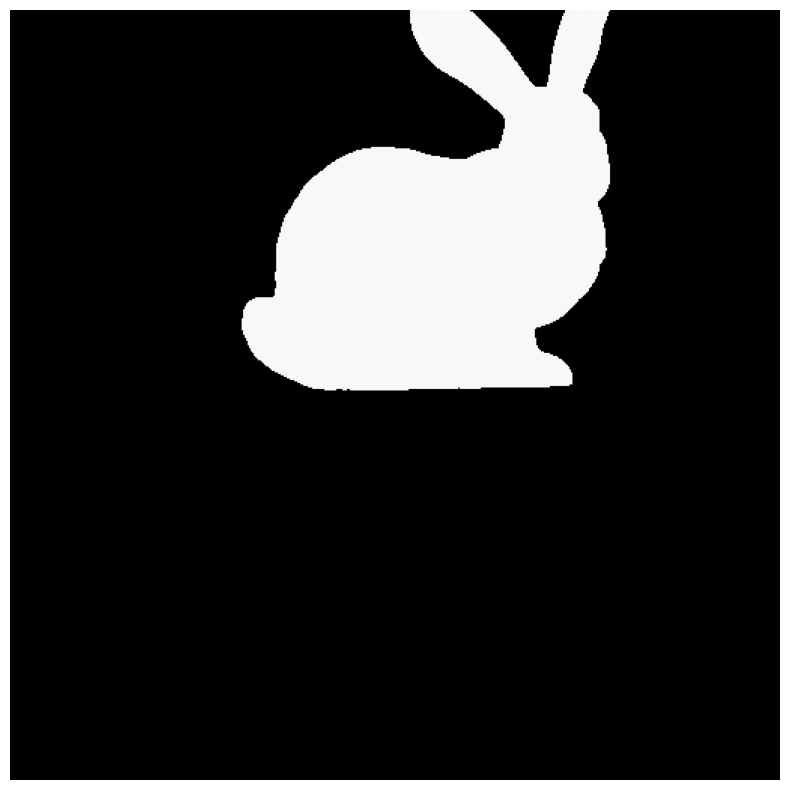

In [23]:
images = silhouette
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., 3].cpu().numpy(), cmap="gray")
plt.axis("off")